In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# importing data
orig_df = pd.read_csv("Bank-full.csv")
df = orig_df.copy()
term_deposits = orig_df.copy()
df.head(10)      # used to see top 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Five pointer summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Checking missing value
df.isnull().sum()
# No missing values found

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

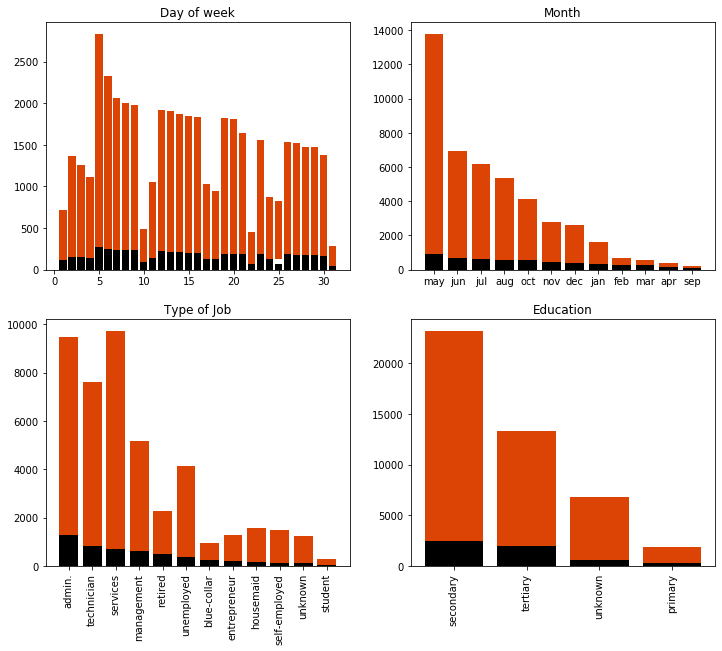

In [8]:
data1 = df[df['Target'] == 'yes']
data2 = df[df['Target'] == 'no']

fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day'].unique(),height = data1['day'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day'].unique(),height = data2['day'].value_counts(),bottom = data1['day'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
#plt.figlegend((b1[0], b2[0]), ('yes', 'no'),loc="right",title = "Term deposit")
plt.show()


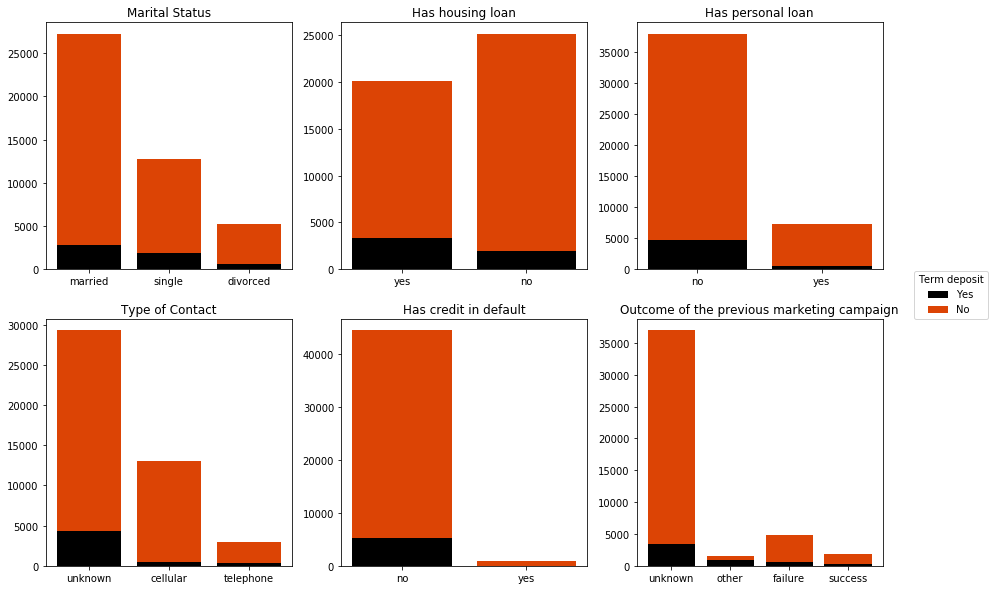

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

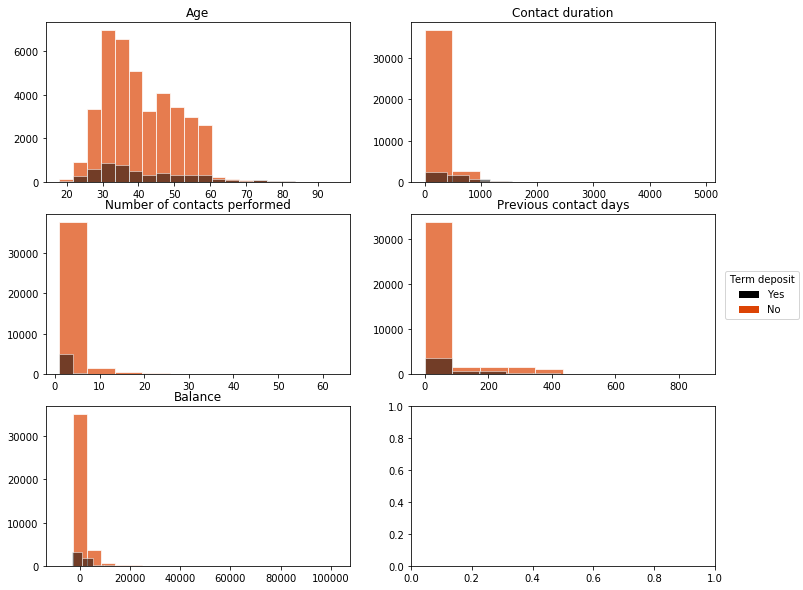

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
ax[2, 0].hist(data2['balance'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[2, 0].hist(data1['balance'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[2, 0].title.set_text('Balance')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

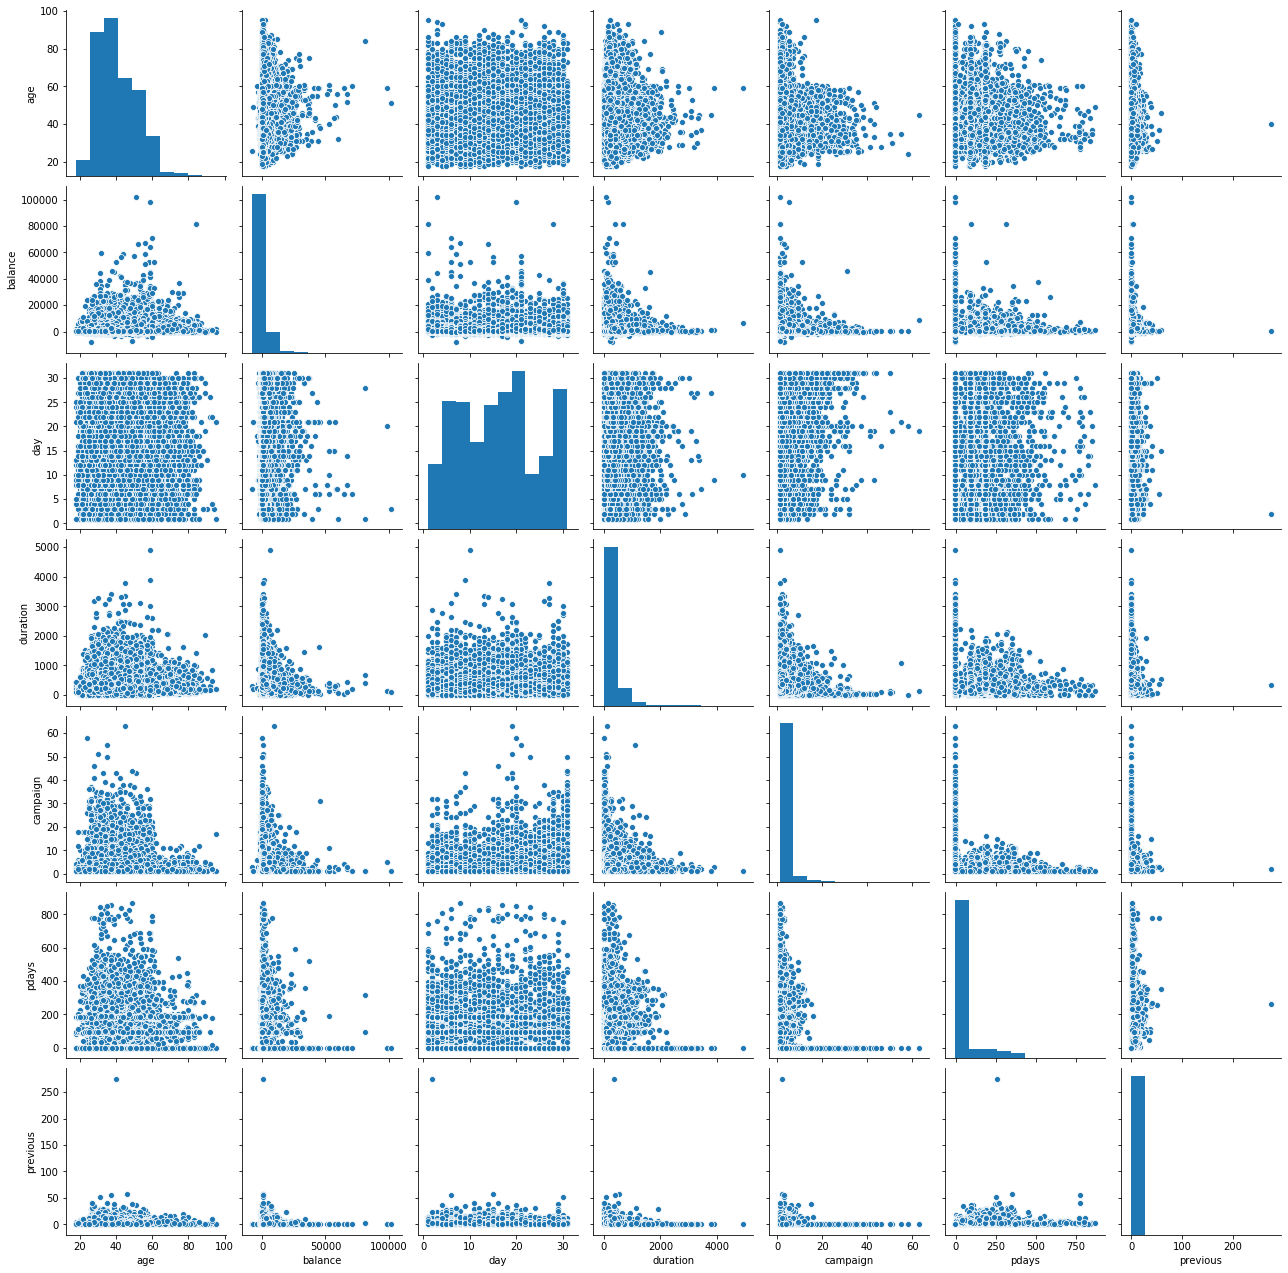

In [11]:
sns.pairplot(df)

In [12]:
#88% refused to suscribe to term deposits while 12% accepted to suscribe term deposits. 
#We observe this imbalance label here.

round(df['Target'].value_counts()*100/len(df))

no     88.0
yes    12.0
Name: Target, dtype: float64

In [13]:
# It is observed that people accepted more to suscribe term deposits in Aug(13%), May(17%) & Jul(12%) month.
round(df[df['Target']=='yes'].groupby(['month']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

month
may    17.0
aug    13.0
jul    12.0
apr    11.0
jun    10.0
feb     8.0
nov     8.0
oct     6.0
sep     5.0
mar     5.0
jan     3.0
dec     2.0
dtype: float64

In [14]:
# It is observed that people accepted more to suscribe term deposits who has Secondary (46%) & Tertiary(38%) education.

In [15]:
round(df[df['Target']=='yes'].groupby(['education']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

education
secondary    46.0
tertiary     38.0
primary      11.0
unknown       5.0
dtype: float64

In [16]:
# It is observed that people accepted more to suscribe term deposits who are married (52%) & Single(36%) education.

In [17]:
round(df[df['Target']=='yes'].groupby(['marital']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

marital
married     52.0
single      36.0
divorced    12.0
dtype: float64

In [18]:
# It is observed that people accepted more to suscribe term deposits who are in below jobs:
#management       25%
#technician       16%
#blue-collar      13%
#admin.           12%
#retired          10%

In [19]:
round(df[df['Target']=='yes'].groupby(['job']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

job
management       25.0
technician       16.0
blue-collar      13.0
admin.           12.0
retired          10.0
services          7.0
student           5.0
unemployed        4.0
self-employed     4.0
entrepreneur      2.0
housemaid         2.0
unknown           1.0
dtype: float64

In [20]:
# It is observed that percentage of people accepted to suscribe term deposits:
# 63% has NO housing loan
# 91% has NO personal loan   

In [21]:
round(df[df['Target']=='yes'].groupby(['housing']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

housing
no     63.0
yes    37.0
dtype: float64

In [22]:
round(df[df['Target']=='yes'].groupby(['loan']).size().sort_values(ascending=False)*100/len(df[df['Target']=='yes']))

loan
no     91.0
yes     9.0
dtype: float64

In [23]:
# This duration column does not make sense in features because customer will be called 
#so if the target client has never received calls this feature is not that useful.  
df = df.drop(['duration'],axis=1)

In [24]:
#Lets try to see job distribution for 60+ age
df['job'][df['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [25]:
#Usaually 60+ is the age of retirement so uknown can be replace with retired for age > 60
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df['job'][df['age']>60].value_counts()

retired          897
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [26]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [27]:
# Lets check crosstab between job and education if unknown values can be replaced with some appropriate guessed values
cross_tab(df,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,371,989,130,796
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [28]:
# Since mostly management jobholders have tertiary so unknown can be replaced with tertiary education who has management job and vice versa
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['job'] == 'unknown') & (df['education']=='tertiary'), 'job'] = 'management'

# Since mostly primary education people have blue-collar job so unknown job can be replaced with blue-collar job who has primary education.
df.loc[(df['job'] == 'unknown') & (df['education']=='primary'), 'job'] = 'blue-collar'

In [29]:
# We noticed in 5 pointer summary that maximume age is 95 which seems outlier 
#so lets set age outliers ( Q3 age + IQR*1.5)

q1_age,q2_age,q3_age,q4_age = df.age.quantile([0.25,0.50,0.75,1])
iqr_age = q3_age - q1_age
lower_age_bound = q1_age -(1.5 * iqr_age) 
upper_age_bound = round(q3_age +(1.5 * iqr_age))
lower_age_bound,upper_age_bound
df.loc[df['age'] >upper_age_bound, ['age']] = upper_age_bound

# We noticed in 5 pointer summary that maximume balance is 102127 and minimum balance is -8019 
#which seems outlier so lets set balance outliers ( Q3 balance + IQR*1.5)
#which seems outlier so lets set balance outliers ( Q1 balance - IQR*1.5)

q1_balance, q3_balance = df.balance.quantile([0.25,0.75])
iqr_balance = q3_balance - q1_balance
lower_balance_bound = q1_balance -(1.5 * iqr_balance) 
upper_balance_bound = round(q3_balance +(1.5 * iqr_balance))
lower_balance_bound,upper_balance_bound
df.loc[df['balance'] >upper_balance_bound, ['balance']] = upper_balance_bound
df.loc[df['balance'] <lower_balance_bound, ['balance']] = lower_balance_bound

# We noticed in 5 pointer summary that maximume campaign is 63 which seems outlier 
#so lets set campaign outliers ( Q3 campaign + IQR*1.5)

q1_campaign, q3_campaign = df.campaign.quantile([0.25,0.75])
iqr_campaign = q3_campaign - q1_campaign
lower_campaign_bound = q1_campaign -(1.5 * iqr_campaign) 
upper_campaign_bound = round(q3_campaign +(1.5 * iqr_campaign))
lower_campaign_bound,upper_campaign_bound
df.loc[df['campaign'] >upper_campaign_bound, ['campaign']] = upper_campaign_bound

# We noticed in 5 pointer summary that maximume previous is 275 which seems outlier
# and since we Q1 & Q3 are zero so lets set previous outliers 99 percentile

lower_previous_bound, upper_previous_bound = round(df.previous.quantile([0.25,0.99]))
lower_previous_bound,upper_previous_bound
df.loc[df['previous'] >upper_previous_bound, ['previous']] = upper_previous_bound


In [30]:
# Listing categorical columns and count per category
for i in df.select_dtypes(['object']).columns:
    print(df[i].value_counts(ascending=True))

unknown           182
student           938
housemaid        1240
unemployed       1303
entrepreneur     1487
self-employed    1579
retired          2286
services         4154
admin.           5171
technician       7597
management       9492
blue-collar      9782
Name: job, dtype: int64
divorced     5207
single      12790
married     27214
Name: marital, dtype: int64
unknown       1615
primary       6851
tertiary     13543
secondary    23202
Name: education, dtype: int64
yes      815
no     44396
Name: default, dtype: int64
no     20081
yes    25130
Name: housing, dtype: int64
yes     7244
no     37967
Name: loan, dtype: int64
telephone     2906
unknown      13020
cellular     29285
Name: contact, dtype: int64
dec      214
mar      477
sep      579
oct      738
jan     1403
feb     2649
apr     2932
nov     3970
jun     5341
aug     6247
jul     6895
may    13766
Name: month, dtype: int64
success     1511
other       1840
failure     4901
unknown    36959
Name: poutcome, dtype: int64
y

In [31]:
#df.select_dtypes(['object']).columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  campaign   45211 non-null  int64  
 12  pdays      45211 non-null  int64  
 13  previous   45211 non-null  float64
 14  poutcome   45211 non-null  object 
 15  Target     45211 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 5.5+ MB


In [32]:
# Lets assign number to yes/no categorical features so that it can tell us correlation in heatmap

df['default'].replace(['yes','no'] , [1,0], inplace=True)
df['housing'].replace(['yes','no'] , [1,0], inplace=True)
df['loan'].replace(['yes','no'] , [1,0], inplace=True)
df['Target'].replace(['yes','no'] , [1,0], inplace=True)

In [33]:
df.describe()

,age,default,balance,housing,loan,day,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,0.018027,933.706974,0.555838,0.160226,15.806419,2.392228,40.197828,0.525691,0.116985
std,10.379659,0.133049,1176.765369,0.496878,0.366820,8.322476,1.600111,100.128746,1.463596,0.321406
min,18.000000,0.000000,-1962.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,0.000000
max,70.000000,1.000000,3462.000000,1.000000,1.000000,31.000000,6.000000,871.000000,9.000000,1.000000


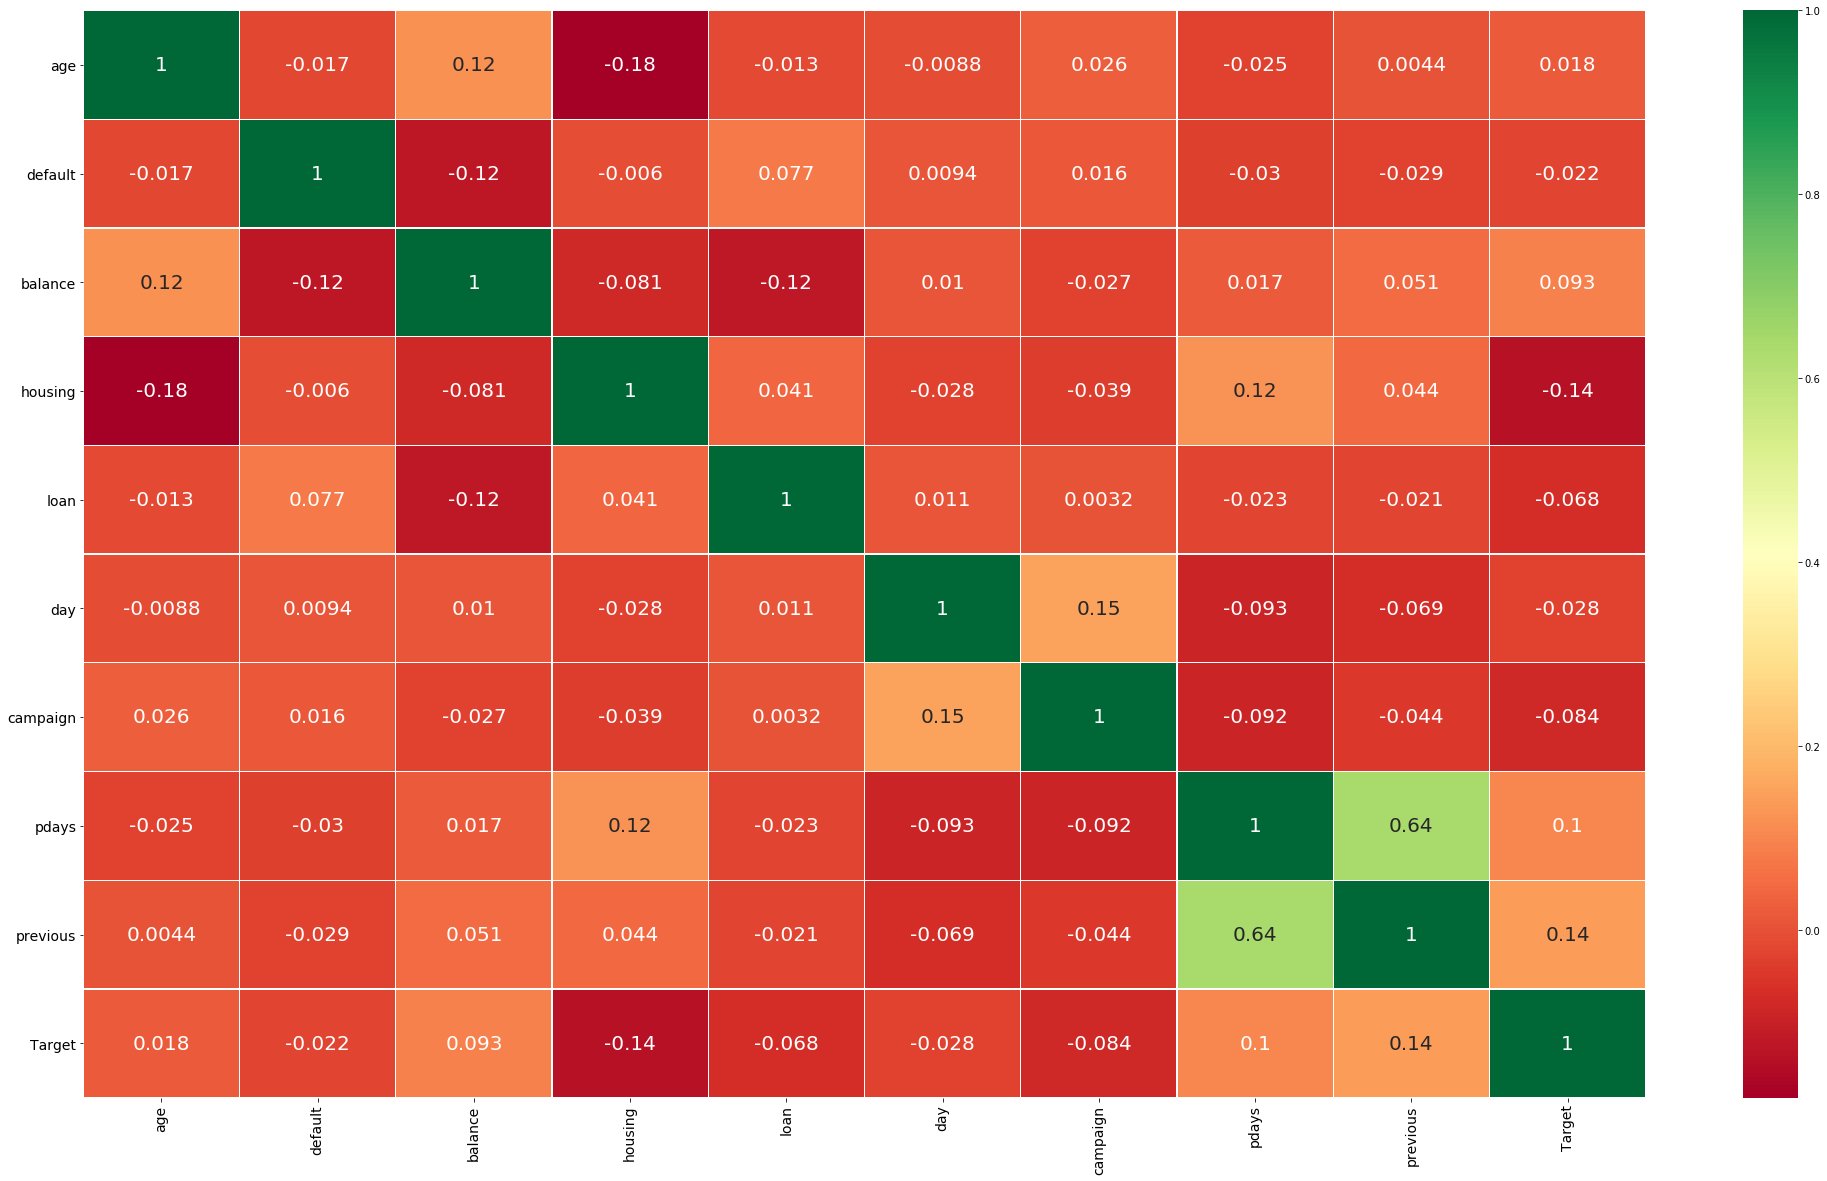

In [34]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(35,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [35]:
# We noticedin heatmap that loan has slightly negative correlation with opening term deposit so lets check distribution

df['loan'].value_counts()*100/len(df)

# Only 16 percent subscribed for deposit so we want to make sure that our training and test set 
#contains the same ratio of 84% "no" and 16% "yes". If we dont make sure this ratio in traning and test data then
# there will be high chances of our data becomes overfit and hamper presicion, recall and F1 scores


0    83.977351
1    16.022649
Name: loan, dtype: float64

In [36]:
# Lets use StratifiedShuffleSplit to make sure that train and test data has same ratio of 84% "no" and 16% "yes" in it
# Also lets have 70:30 ration for modeling
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
term_deposits = term_deposits.drop(['duration'],axis=1)
for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

no     0.251952
yes    0.048064
Name: loan, dtype: float64

In [37]:
# Separate the labels and the features.# Make a copy of the stratified training set.
train_data = stratified_train 
test_data = stratified_test
train_data.shape
test_data.shape
train_data['Target'].value_counts()


no     27902
yes     3745
Name: Target, dtype: int64

In [38]:
# Lets perform one hot encoding on train data for categorical columns values

# Lets prepare list of non-categorical column list
non_dummy_cols = ["age", "balance", "day", "campaign", "pdays", "previous" ] 

# minus above non categorical column list from rest to get categorical columns list
dummy_cols = list(set(df.columns) - set(non_dummy_cols))

# One hot encoding on categorical columns for train data
train_data = pd.get_dummies(train_data, columns=dummy_cols,drop_first=True)

In [39]:
# Lets prepare list of non-categorical column list for train data
col_names = ["age", "balance", "day", "campaign", "pdays", "previous"]
features = train_data[col_names]

# perform scaling on non categorical column for train data
# Since these non-categorical column values falles into different ranges which are not similar
# so caling basically will help us to normalise the these data within a particular range. 
#scaling also helps in speeding up the calculations in an algorithm.
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
features

array([[ 1.32393747,  0.06654598,  0.38393041, -0.5664345 , -0.41257837,
        -0.23704262],
       [-0.65374657, -0.52572252, -0.57757043,  1.04982667, -0.41257837,
        -0.23704262],
       [ 0.1938323 , -0.33437424, -0.09682001,  0.08006997, -0.41257837,
        -0.23704262],
       ...,
       [ 0.09965687, -0.35552668,  0.86468084, -0.5664345 , -0.41257837,
        -0.23704262],
       [ 0.28800773, -0.20192738,  1.82618169,  0.4033222 , -0.41257837,
        -0.23704262],
       [-1.31297459, -0.41605522,  0.26374281,  0.08006997, -0.41257837,
        -0.23704262]])

In [40]:
# lets replace original non-categorical column values with scalled values in train data
train_data[col_names] = features

In [41]:
train_data

,age,balance,day,campaign,pdays,previous,Target_yes,marital_married,marital_single,poutcome_other,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
11470,1.323937,0.066546,0.383930,-0.566435,-0.412578,-0.237043,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
36381,-0.653747,-0.525723,-0.577570,1.049827,-0.412578,-0.237043,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14595,0.193832,-0.334374,-0.096820,0.080070,-0.412578,-0.237043,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
29368,2.265692,0.186301,-1.659259,-0.243182,-0.412578,-0.237043,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
24144,0.193832,-0.436231,-0.817946,-0.566435,-0.412578,-0.237043,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45083,1.700639,-0.286212,0.744493,0.080070,1.421954,0.166513,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17467,-0.653747,0.099739,1.465619,0.080070,-0.412578,-0.237043,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
16274,0.099657,-0.355527,0.864681,-0.566435,-0.412578,-0.237043,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
18516,0.288008,-0.201927,1.826182,0.403322,-0.412578,-0.237043,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
# Lets perform one hot encoding on test data for categorical columns values

# Lets prepare list of non-categorical column list
non_dummy_cols = ["age", "balance", "day", "campaign", "pdays", "previous" ] 

# minus above non categorical column list from rest to get categorical columns list
dummy_cols = list(set(df.columns) - set(non_dummy_cols))

# One hot encoding on categorical columns for test data
test_data = pd.get_dummies(test_data, columns=dummy_cols,drop_first=True)


In [43]:
# Lets prepare list of non-categorical column list for test data
col_names = ["age", "balance", "day", "campaign", "pdays", "previous"]
features = test_data[col_names]

# perform scaling on non categorical column for test data
# Since these non-categorical column values falles into different ranges which are not similar
# so caling basically will help us to normalise the these data within a particular range. 
#scaling also helps in speeding up the calculations in an algorithm.
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
features

array([[ 1.04311187, -0.32252981,  0.62345321, -0.25442018,  1.42617454,
         0.23801318],
       [-1.12281399, -0.44712372, -1.05778723, -0.25442018, -0.40882273,
        -0.3076952 ],
       [-1.0286433 , -0.42092877, -0.09707841, -0.25442018, -0.40882273,
        -0.3076952 ],
       ...,
       [ 0.66642911, -0.28995404, -0.21716701, -0.57615759, -0.40882273,
        -0.3076952 ],
       [ 2.07898945, -0.38667384, -0.09707841, -0.25442018,  1.42617454,
         2.42084667],
       [-0.18110709, -0.2308475 , -0.09707841, -0.57615759, -0.40882273,
        -0.3076952 ]])

In [44]:
# lets replace original non-categorical column values with scalled values in train data
test_data[col_names] = features

In [45]:
test_data

,age,balance,day,campaign,pdays,previous,Target_yes,marital_married,marital_single,poutcome_other,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_yes,loan_yes
43518,1.043112,-0.322530,0.623453,-0.254420,1.426175,0.238013,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1
813,-1.122814,-0.447124,-1.057787,-0.254420,-0.408823,-0.307695,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3510,-1.028643,-0.420929,-0.097078,-0.254420,-0.408823,-0.307695,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
18880,-0.369448,-0.327903,-1.418053,-0.576158,-0.408823,-0.307695,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
38234,-1.311155,-0.284581,-0.097078,-0.576158,3.221063,0.783722,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,0.383917,-0.530746,-1.778319,-0.576158,-0.408823,-0.307695,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
8742,-0.934473,-0.447124,-1.418053,-0.254420,-0.408823,-0.307695,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2847,0.666429,-0.289954,-0.217167,-0.576158,-0.408823,-0.307695,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
44193,2.078989,-0.386674,-0.097078,-0.254420,1.426175,2.420847,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# prepare train and test dataframes for modeling
xtrain = train_data.loc[:, train_data.columns != 'Target_yes']
ytrain = train_data.loc[:, train_data.columns == 'Target_yes']
xtest =  test_data.loc[:, test_data.columns != 'Target_yes']
ytest=  test_data.loc[:, test_data.columns == 'Target_yes']


In [47]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain,ytrain)
#model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

Trainig accuracy 0.8912377160552343

Testing accuracy 0.8956060159245061

Confusion Matrix


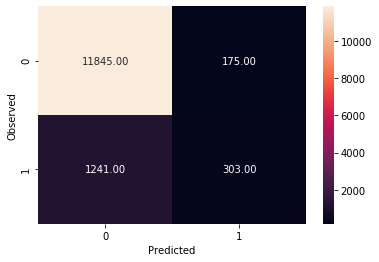

None

Recall: 0.19624352331606218

Precision: 0.6338912133891214

F1 Score: 0.2997032640949555

Roc Auc Score: 0.5908422275482141


In [49]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

In [50]:
# Lets find out the best solver for logistic regression model

# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.891, 0.891, 0.891, 0.891, 0.891]

[0.896, 0.896, 0.896, 0.896, 0.895]


In [51]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changed value of penaly to 'l1'
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.891, 0.891]

[0.896, 0.895]


In [52]:
# We found liblinear is good solver to use so lets fit the model
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', class_weight={0:1,1:1.15}) # changing class weight to balanced

model.fit(xtrain, ytrain)  

y_predict = model.predict(xtest)  

Trainig accuracy 0.890826934622555

Testing accuracy 0.8945001474491301

Confusion Matrix


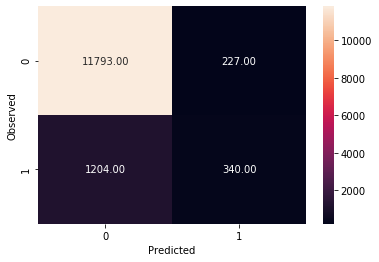

None

Recall: 0.22020725388601037

Precision: 0.599647266313933

F1 Score: 0.32212221695878734

Roc Auc Score: 0.6006610312691282


In [53]:
# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

In [54]:

acc_DT = accuracy_score(ytest, y_predict)

In [55]:

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Regression'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Regression,0.8945


Trainig accuracy 0.891616898916169

Testing accuracy 0.8953848422294308

Confusion Matrix


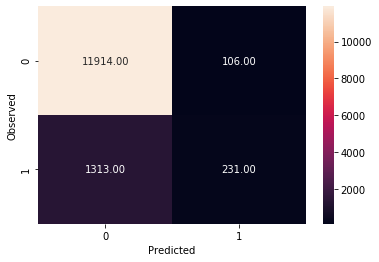

None

Recall: 0.14961139896373057

Precision: 0.685459940652819

F1 Score: 0.2456140350877193

Roc Auc Score: 0.5703963816782047


In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=10,max_depth=3,criterion = "entropy" )  #assigning a variable for the algorithm

model.fit(xtrain, ytrain)  

y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

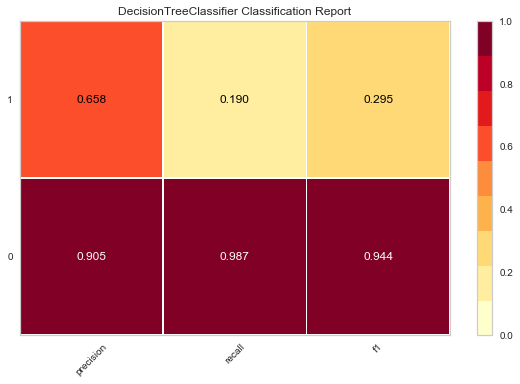

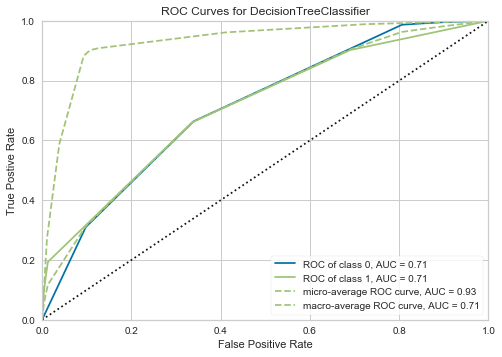

In [57]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(DecisionTreeClassifier(random_state=10,max_depth=3,criterion = "entropy"))
viz.fit(xtest, ytest)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(random_state=10,max_depth=3,criterion = "entropy"))
roc.fit(xtest, ytest)
roc.score(xtest, ytest)
roc.show()

In [58]:

preds_train = viz.predict(xtrain)
preds_test = viz.predict(xtest)

acc_DT = accuracy_score(ytest, preds_test)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Regression,0.894500
0,Decision Tree,0.896564


Trainig accuracy 0.891616898916169

Testing accuracy 0.8953848422294308

Confusion Matrix


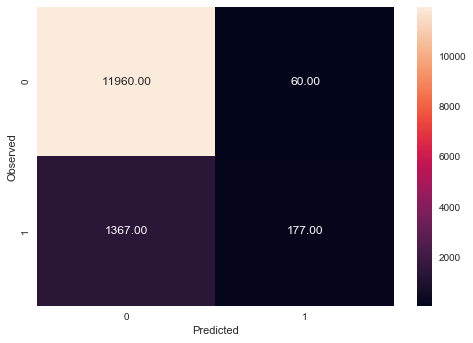

None

Recall: 0.11463730569948187

Precision: 0.7468354430379747

F1 Score: 0.19876473891072435

Roc Auc Score: 0.554822812583518


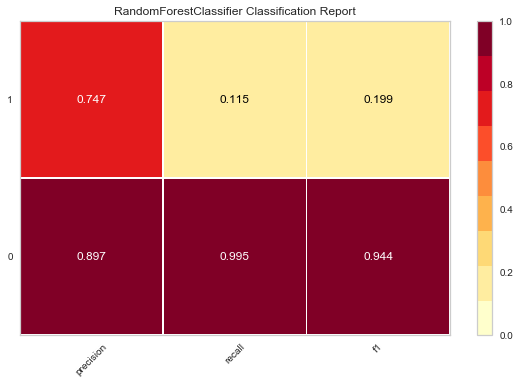

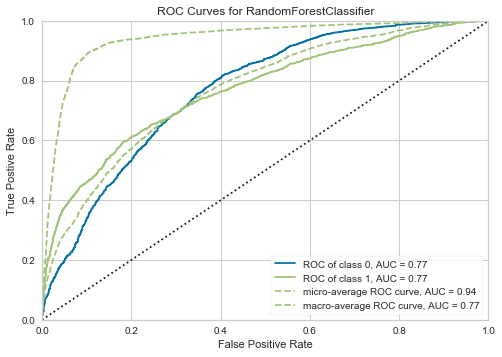

In [59]:
# lETS TRY RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=12,max_depth=4,criterion="entropy")
rfcl = rfcl.fit(xtest, ytest)
y_predict = rfcl.predict(xtest)
# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(rfcl)
viz.fit(xtest, ytest)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(rfcl)
roc.fit(xtest, ytest)
roc.score(xtest, ytest)
roc.show()

In [60]:

acc_RF = accuracy_score(ytest, y_predict)
tempResultsDf = pd.DataFrame({'Method':['Random Forest - 2'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Regression,0.894500
0,Decision Tree,0.896564
0,Random Forest - 2,0.894795


In [61]:
# lETS TRY BaggingClassifier
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),n_estimators=100, max_samples= .9, bootstrap=True, oob_score=True, random_state=2)
bgcl = bgcl.fit(xtest, ytest)

Trainig accuracy 0.891616898916169

Testing accuracy 0.8953848422294308

Confusion Matrix


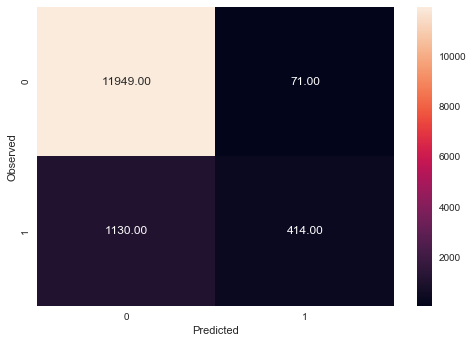

None

Recall: 0.26813471502590674

Precision: 0.8536082474226804

F1 Score: 0.4080827994085757

Roc Auc Score: 0.6311139465312562


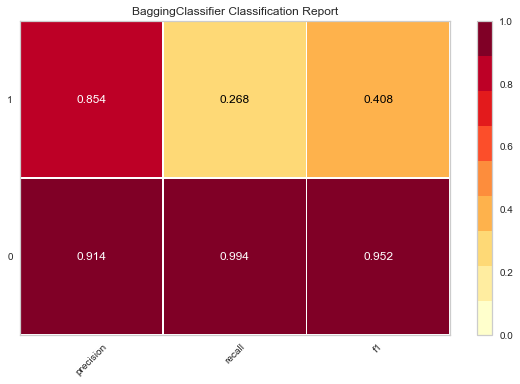

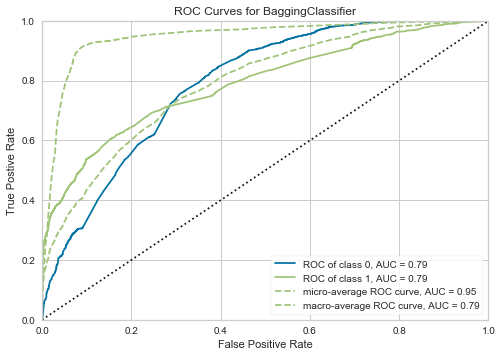

In [62]:
y_predict = bgcl.predict(xtest)

# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(bgcl)
viz.fit(xtest, ytest)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(xtest, ytest)
roc.score(xtest, ytest)
roc.show()

In [63]:
acc_BG = accuracy_score(ytest, y_predict)
tempResultsDf = pd.DataFrame({'Method':['Bagging Regularised'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Regression,0.894500
0,Decision Tree,0.896564
0,Random Forest - 2,0.894795
0,Bagging Regularised,0.911457


Trainig accuracy 0.891616898916169

Testing accuracy 0.8953848422294308

Confusion Matrix


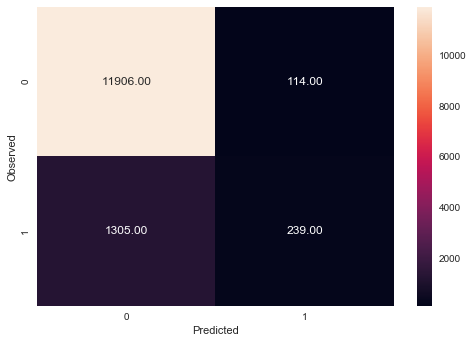

None

Recall: 0.15479274611398963

Precision: 0.6770538243626062

F1 Score: 0.2519768054823405

Roc Auc Score: 0.5726542765511713


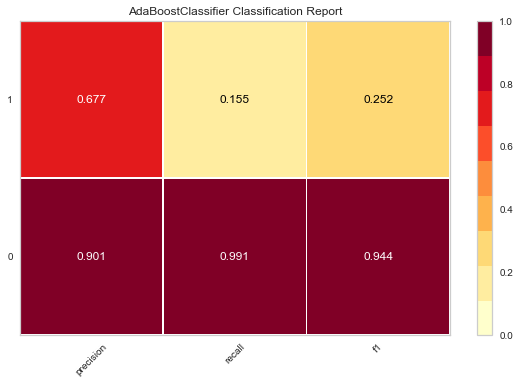

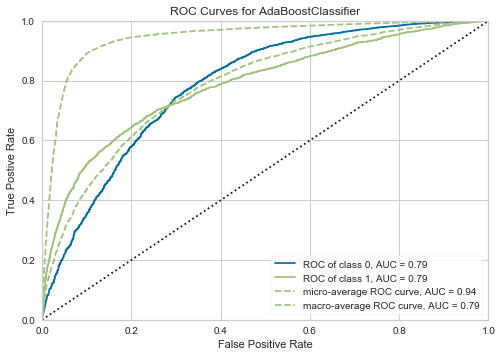

In [64]:
# Lets try AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.2, random_state=10)
abcl = abcl.fit(xtest, ytest)

y_predict =abcl.predict(xtest)
acc_AB = accuracy_score(ytest, y_predict)

# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

# Visualize model performance with yellowbrick library
viz = ClassificationReport(abcl)
viz.fit(xtest, ytest)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(abcl)
roc.fit(xtest, ytest)
roc.score(xtest, ytest)
roc.show()

Trainig accuracy 0.891616898916169

Testing accuracy 0.8953848422294308

Confusion Matrix


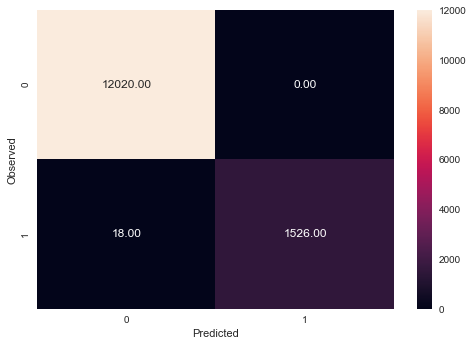

None

Recall: 0.9883419689119171

Precision: 1.0

F1 Score: 0.9941368078175895

Roc Auc Score: 0.9941709844559585


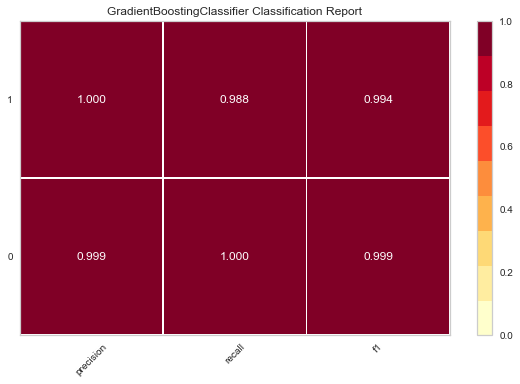

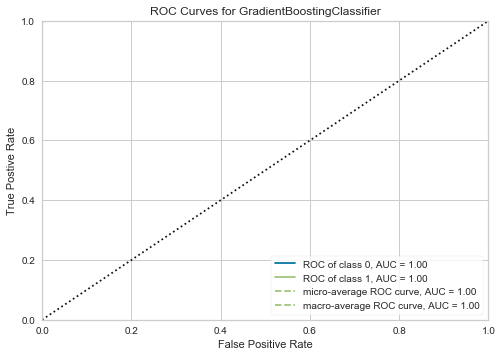

In [67]:
#Lets try GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 125, learning_rate = 0.4, max_depth=7,random_state=15)
gbcl = gbcl.fit(xtest, ytest)
y_predict = gbcl.predict(xtest)
acc_GB = accuracy_score(ytest, y_predict)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

# Lets checks the accuracy,Recall, Precision, F1 score and confusion matrix
print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(gbcl)
viz.fit(xtest, ytest)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(gbcl)
roc.fit(xtest, ytest)
roc.score(xtest, ytest)
roc.show()

In [66]:
resultsDf

,Method,accuracy
0,Regression,0.894500
0,Decision Tree,0.896564
0,Random Forest - 2,0.894795
0,Bagging Regularised,0.911457
0,Adaboost,0.895385
0,Gradient Boost,0.994471
